## Simple HHL algorithm Qiskit implementation

#### Imports

In [2]:
from HHL_implementation import*

#### Now let's try this algorithm for different matrices. These matrices must meet the following requirements:
#### 1. Hermitian
#### 2. Sparse: not needed to make it work but needed if we want a speedup against classical computers
#### 3. Well-conditioned (low condition number kappa=largest eigenvalue / smallest eigenvalue)
#### 4. Scaled eigenvalues (between 0 and 1): actually not needed since the code already takes care of that

In [3]:
test_cases = []

# CASE 1: Fractional Eigenvalues
A1 = np.array([[1.0, -1/3], [-1/3, 1.0]])
b1 = np.array([0, 1])
test_cases.append(("2x2 Fractional Eigenvalues", A1, b1, 4))

# CASE 2: Integer Eigenvalues
A2 = np.array([[1.5, 0.5], [0.5, 1.5]])
b2 = np.array([1, 0])
test_cases.append(("2x2 Integer Eigenvalues", A2, b2, 4))

# CASE 3: High Contrast Eigenvalues (1 and 3)
A3 = np.array([[2.0, 1.0], [1.0, 2.0]])
b3 = np.array([0, 1])
test_cases.append(("2x2 High Contrast", A3, b3, 4))

# CASE 4: The Poisson Equation
A4 = 2*np.eye(4) - np.eye(4, k=1) - np.eye(4, k=-1)
b4 = np.array([1, 0, 0, 1])
test_cases.append(("4x4 Poisson Equation", A4, b4, 5))

# CASE 5: Block Diagonal
blk = np.array([[1.5, 0.5], [0.5, 1.5]])
A5 = np.kron(np.eye(2), blk)
b5 = np.array([0, 1, 0, 1])
test_cases.append(("4x4 Block Diagonal", A5, b5, 5))

# CASE 6: Dense Random
np.random.seed(42)
R = np.random.rand(4, 4)
A6 = R + R.T + 2*np.eye(4) 
b6 = np.array([1, 1, 1, 1])
test_cases.append(("4x4 Random Dense", A6, b6, 6))

#### Execute this cell to run the algorithm


############## Running: 2x2 Fractional Eigenvalues ##############
Matrix A:
 [[ 1.   -0.33]
 [-0.33  1.  ]]
  -> Simulating Quantum Circuit (without Noise)...

  -> Simulating Quantum Circuit (with Noise)...
 -> Starting sweep with 10 steps up to error 0.01...


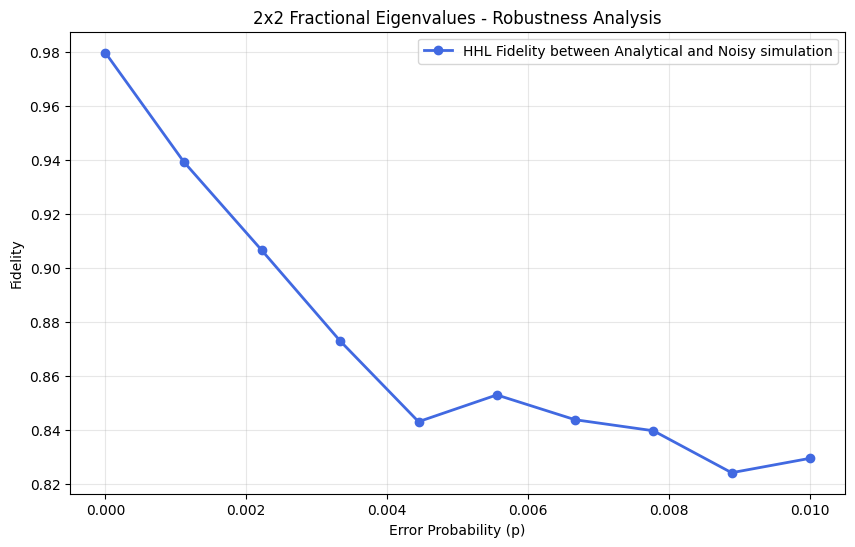


  -> Simulating Quantum Circuit (with Noise probability 0.01)...

--- FIDELITY RESULTS ---
 Algorithm (Ideal vs Exact Solution): 0.9852
 Robustness (Ideal vs Noisy): 0.8198
 Possible real experiment (Noisy vs Exact Solution): 0.8198
  [Saved] Plot saved as: results/2x2_Fractional_Eigenvalues.pdf


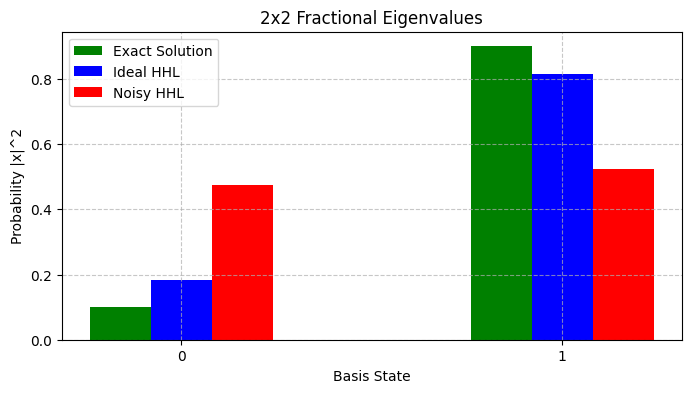


############## Running: 2x2 Integer Eigenvalues ##############
Matrix A:
 [[1.5 0.5]
 [0.5 1.5]]
  -> Simulating Quantum Circuit (without Noise)...

  -> Simulating Quantum Circuit (with Noise)...
 -> Starting sweep with 10 steps up to error 0.01...


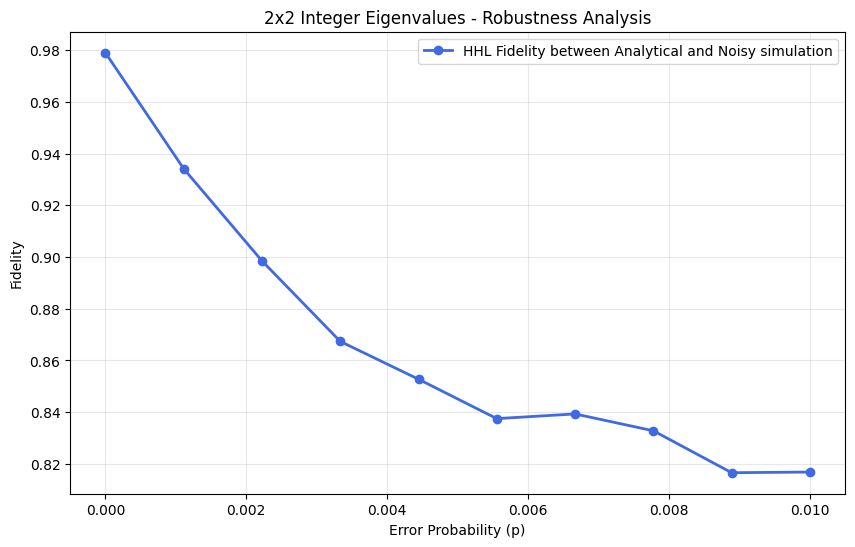


  -> Simulating Quantum Circuit (with Noise probability 0.01)...

--- FIDELITY RESULTS ---
 Algorithm (Ideal vs Exact Solution): 0.9822
 Robustness (Ideal vs Noisy): 0.8150
 Possible real experiment (Noisy vs Exact Solution): 0.8150
  [Saved] Plot saved as: results/2x2_Integer_Eigenvalues.pdf


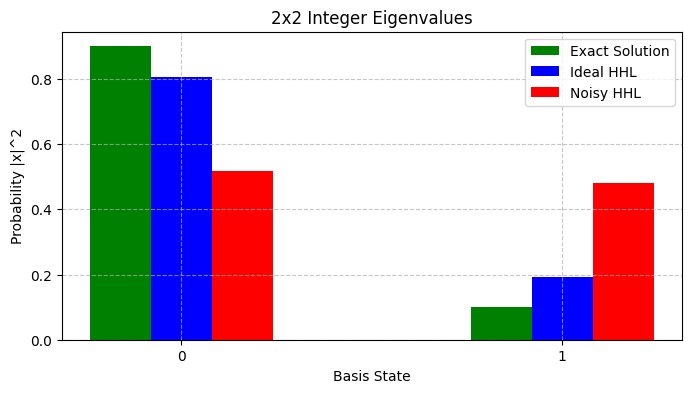


############## Running: 2x2 High Contrast ##############
Matrix A:
 [[2. 1.]
 [1. 2.]]
  -> Simulating Quantum Circuit (without Noise)...

  -> Simulating Quantum Circuit (with Noise)...
 -> Starting sweep with 10 steps up to error 0.01...


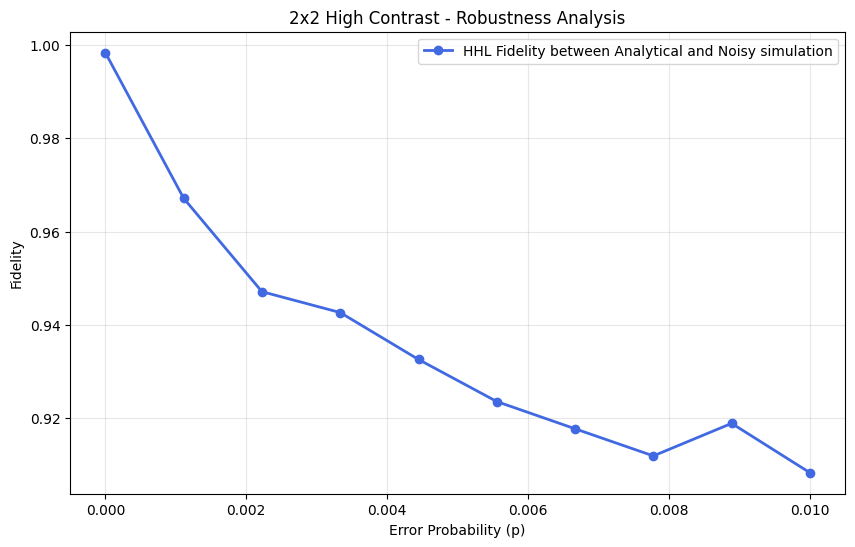


  -> Simulating Quantum Circuit (with Noise probability 0.01)...

--- FIDELITY RESULTS ---
 Algorithm (Ideal vs Exact Solution): 0.9918
 Robustness (Ideal vs Noisy): 0.9117
 Possible real experiment (Noisy vs Exact Solution): 0.9117
  [Saved] Plot saved as: results/2x2_High_Contrast.pdf


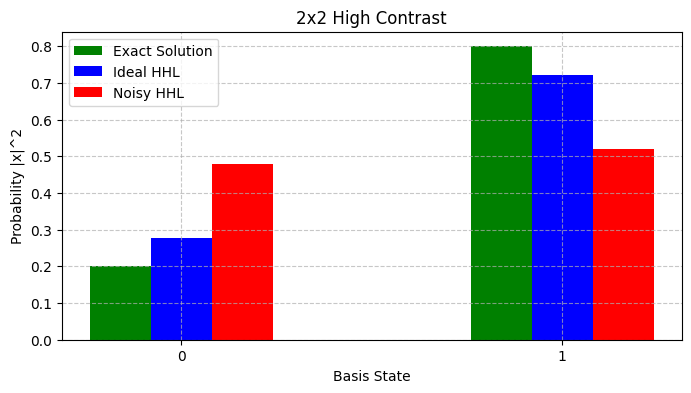


############## Running: 4x4 Poisson Equation ##############
Matrix A:
 [[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]
  -> Simulating Quantum Circuit (without Noise)...

  -> Simulating Quantum Circuit (with Noise)...
 -> Starting sweep with 10 steps up to error 0.01...


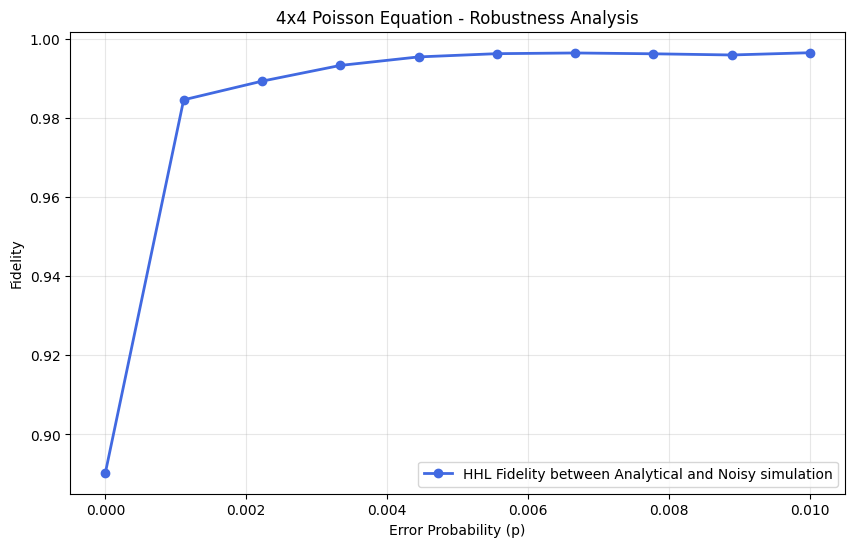


  -> Simulating Quantum Circuit (with Noise probability 0.01)...

--- FIDELITY RESULTS ---
 Algorithm (Ideal vs Exact Solution): 0.9090
 Robustness (Ideal vs Noisy): 0.9973
 Possible real experiment (Noisy vs Exact Solution): 0.9973
  [Saved] Plot saved as: results/4x4_Poisson_Equation.pdf


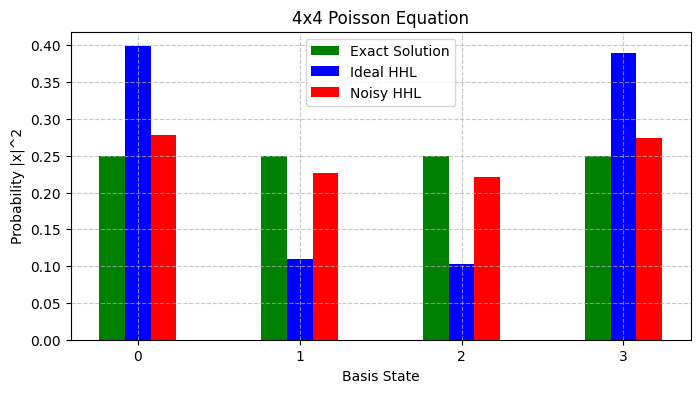


############## Running: 4x4 Block Diagonal ##############
Matrix A:
 [[1.5 0.5 0.  0. ]
 [0.5 1.5 0.  0. ]
 [0.  0.  1.5 0.5]
 [0.  0.  0.5 1.5]]
  -> Simulating Quantum Circuit (without Noise)...

  -> Simulating Quantum Circuit (with Noise)...
 -> Starting sweep with 10 steps up to error 0.01...


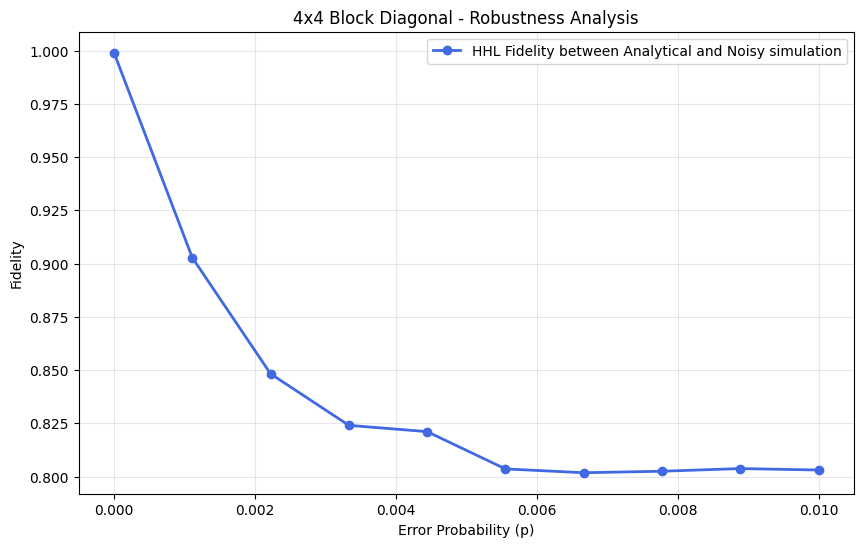


  -> Simulating Quantum Circuit (with Noise probability 0.01)...

--- FIDELITY RESULTS ---
 Algorithm (Ideal vs Exact Solution): 0.9962
 Robustness (Ideal vs Noisy): 0.8052
 Possible real experiment (Noisy vs Exact Solution): 0.8052
  [Saved] Plot saved as: results/4x4_Block_Diagonal.pdf


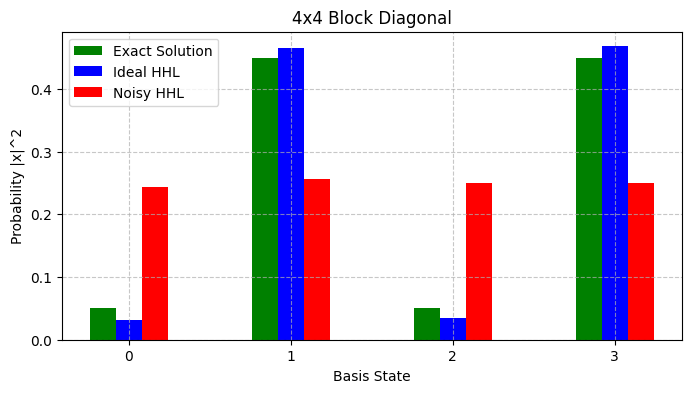


############## Running: 4x4 Random Dense ##############
Matrix A:
 [[2.75 1.11 1.33 1.43]
 [1.11 2.31 0.77 1.08]
 [1.33 0.77 2.04 1.15]
 [1.43 1.08 1.15 2.37]]
  -> Simulating Quantum Circuit (without Noise)...

  -> Simulating Quantum Circuit (with Noise)...
 -> Starting sweep with 10 steps up to error 0.01...


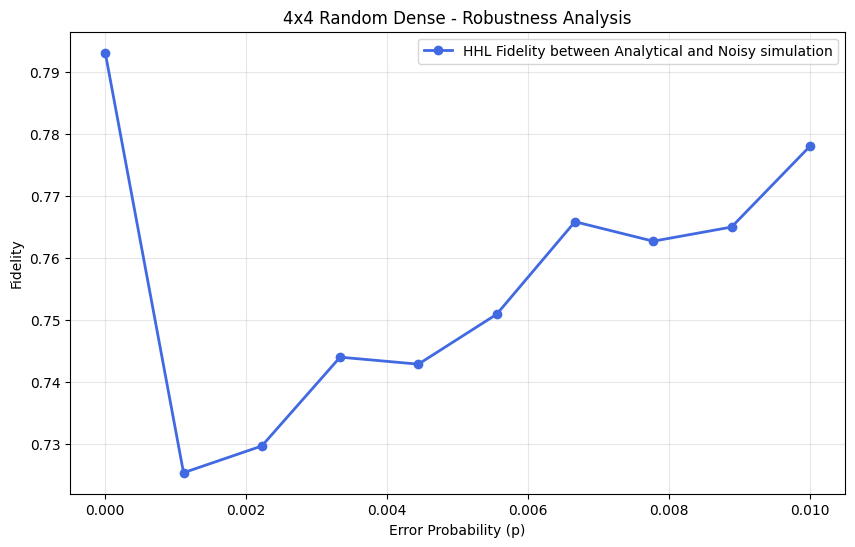


  -> Simulating Quantum Circuit (with Noise probability 0.01)...

--- FIDELITY RESULTS ---
 Algorithm (Ideal vs Exact Solution): 0.7918
 Robustness (Ideal vs Noisy): 0.7707
 Possible real experiment (Noisy vs Exact Solution): 0.7707
  [Saved] Plot saved as: results/4x4_Random_Dense.pdf


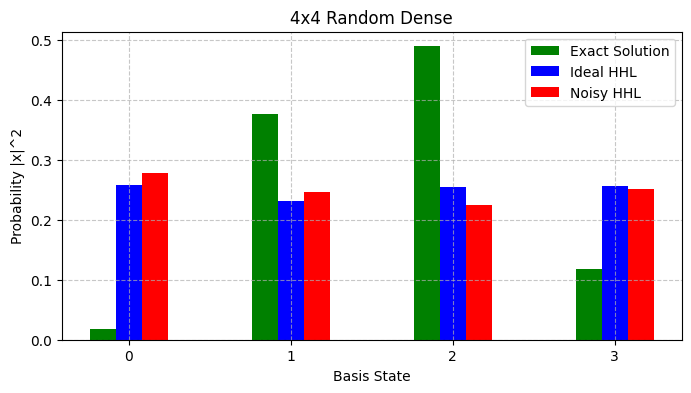

In [4]:
for title, A, b, k in test_cases:
    solver = HHL(A, b, clock_qubits=k)                              
    solver.run_and_plot(title=title, p_error=0.01, sweep_steps=10, max_error=0.01)